In [1]:
using Catalyst
using DifferentialEquations
using WGLMakie
using Latexify
using Symbolics
using Nemo
using Graphs


Welcome to Nemo version 0.45.7

Nemo comes with absolutely no warranty whatsoever


In [2]:
rn = @reaction_network begin
    k1, 0 --> S
    k2, S+I --> 2I
    k3, I --> R
    k4, R --> S
    k5, S --> R
    k6, S --> 0
    k7, I --> 0
    k8, R --> 0
end

Model ##ReactionSystem#236
Unknowns (3):
  S(t)
  I(t)
  R(t)
Parameters (8):
  k1
  k2
  k3
  k4
  k5
  k6
⋮

In [3]:
odesys=convert(ODESystem,rn) # the corresponding system of ODEs

Model ##ReactionSystem#236 with 3 equations
Unknowns (3):
  S(t)
  I(t)
  R(t)
Parameters (8):
  k1
  k2
  k3
  k4
  k5
  k6
⋮

In [5]:
deficiency(rn)

1

In [3]:
nsys = convert(NonlinearSystem, rn)

Model ##ReactionSystem#236 with 3 equations
Unknowns (3):
  S(t)
  I(t)
  R(t)
Parameters (8):
  k1
  k2
  k3
  k4
  k5
  k6
⋮

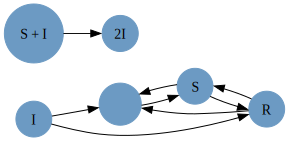

In [6]:
cg=complexgraph(rn)

In [13]:
D=incidencemat(rn)
Z=complexstoichmat(rn)

3×6 Matrix{Int64}:
 0  1  1  0  0  0
 0  0  1  2  1  0
 0  0  0  0  0  1

In [20]:
L=-Z*D

3×8 Matrix{Int64}:
 -1   1   0  -1   1  1  0  0
  0  -1   1   0   0  0  1  0
  0   0  -1   1  -1  0  0  1

In [4]:
nsys

Model ##ReactionSystem#236 with 3 equations
Unknowns (3):
  S(t)
  I(t)
  R(t)
Parameters (8):
  k1
  k2
  k3
  k4
  k5
  k6
⋮

In [18]:
@variables t S(t) R(t)
expr=[S+R-2,2*S-3*R-6]
symbolic_solve(expr,[S,R])

LoadError: KeyError: key R not found